<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-capeju/blob/main/TecMty_kmeans_target_A01793931.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maestría en Inteligencia Artificial Aplicada

Ciencia y Analítica de Datos

Tecnológico de Monterrey

**Alumno:** Carlos Jesús Peñaloza Julio -- A01793931

**Profesora:** María de la Paz Rico Fernández

**Fecha de entrega:** Noviembre 9 de 2022

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 545 kB/s 
     |████████████████████████████████| 1.0 MB 3.8 MB/s 
     |████████████████████████████████| 1.7 MB 44.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 65.0 MB/s 
     |████████████████████████████████| 6.3 MB 37.7 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=137a25cfa478a1d4274eb30c6fe384eeb91b35ba77ab7f4aa191067533bd7db5
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=0b0137f4e1fa90ae4975c2c3fd877628235513bc3faead1f5842ef7684609612
  Stored in directory: /root/.c

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [3]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [4]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [6]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

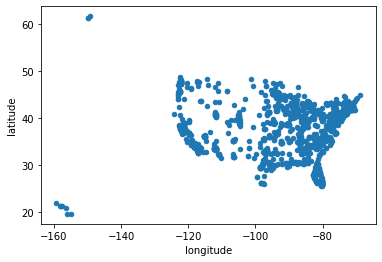

In [7]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [8]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [10]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [11]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [12]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [13]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

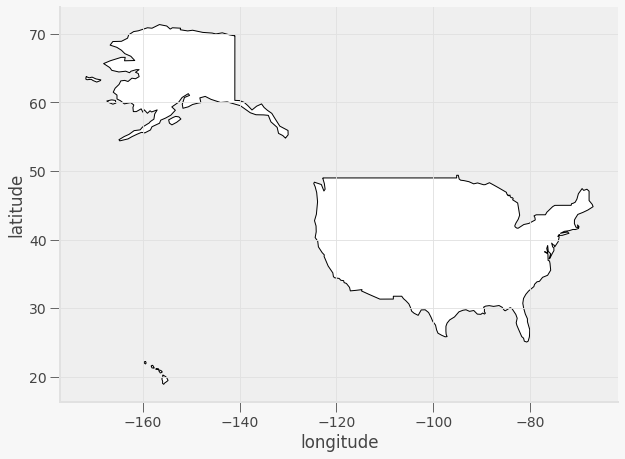

In [14]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

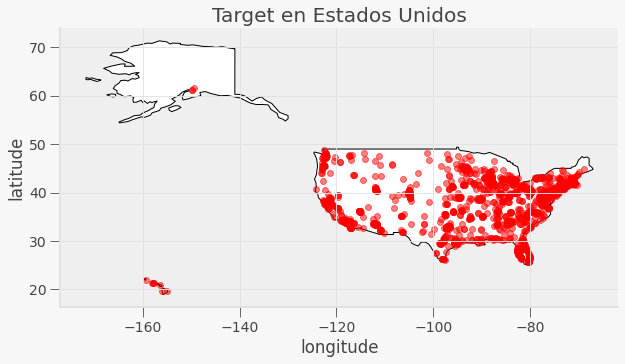

In [15]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [16]:
#tu codigo aquí

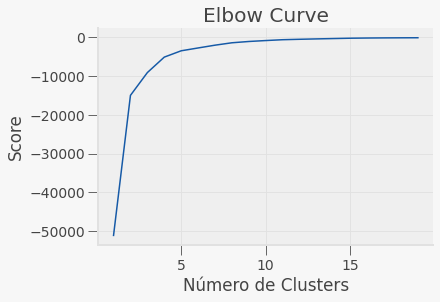

In [44]:
from sklearn.cluster import KMeans

K_clusters = range(1,20)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = latlong[['latitude']]
X_axis = latlong[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

plt.plot(K_clusters, score)
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

**Coordenadas halladas:**

In [43]:
X = df[["longitude","latitude"]]
X

,longitude,latitude
0,-86.804174,33.224225
1,-86.989778,33.334550
2,-87.895932,30.602875
3,-86.971559,34.560148
4,-85.446422,31.266061
...,...,...
1834,-88.176840,43.034293
1835,-88.259806,42.989604
1836,-106.264166,42.846799
1837,-104.800048,41.162019


In [45]:
#Aplicamos K-means
kmeans = KMeans(n_clusters=5).fit(X)
centroides = kmeans.cluster_centers_
labels = kmeans.predict(X)
c_c = kmeans.cluster_centers_
mdf = pd.DataFrame(c_c)


mdf["Coordenadas"] = list(zip(mdf[0], mdf[1]))
mdf["Coordenadas"] = mdf["Coordenadas"].apply(Point)


geo_mdf = gpd.GeoDataFrame(mdf, geometry="Coordenadas")
geo_mdf

,0,1,Coordenadas
0,-82.933092,31.103912,POINT (-82.93309 31.10391)
1,-119.176343,37.579774,POINT (-119.17634 37.57977)
2,-75.585080,40.343655,POINT (-75.58508 40.34366)
3,-98.266337,34.420357,POINT (-98.26634 34.42036)
4,-88.354978,41.759636,POINT (-88.35498 41.75964)


Para conocer la ciudad, basados en las coordenadas, podemos hacer lo siguiente:

In [31]:
#Primero importamos las librerías relacionadas con la geo-localización
from geopy.geocoders.yandex import Location
from geopy.geocoders import Nominatim 
from geopy.distance import geodesic

In [54]:
#Las posiciones geográficas las podemos ordenar según la tabla de coordenadas así:

Posicion_0 = str(geo_mdf[1][0]) + ", " + str(geo_mdf[0][0])
Posicion_1 = str(geo_mdf[1][1]) + ", " + str(geo_mdf[0][1])
Posicion_2 = str(geo_mdf[1][2]) + ", " + str(geo_mdf[0][2])
Posicion_3 = str(geo_mdf[1][3]) + ", " + str(geo_mdf[0][3])
Posicion_4 = str(geo_mdf[1][4]) + ", " + str(geo_mdf[0][4])

#Posterior al paso anterior, se usa la función Nominatium
geolocator = Nominatim(user_agent="my-application")
Posiciones = [Posicion_0, Posicion_1, Posicion_2, Posicion_3, Posicion_4]

In [61]:
for i in Posiciones:
  location = geolocator.reverse(i)
  print('Cluster ubicado en: ---', location.address)

Cluster ubicado en: --- Foyd Lee Loop, Clinch County, Georgia, United States
Cluster ubicado en: --- Iron Lake Trail, Madera County, California, United States
Cluster ubicado en: --- Congo Road, Congo, Douglass Township, Montgomery County, Pennsylvania, 19525, United States
Cluster ubicado en: --- County Road E1790, Cotton County, Oklahoma, United States
Cluster ubicado en: --- 129, South Western Avenue, Aurora, Aurora Township, Kane County, Illinois, 60506, United States


En aras de contar las tiendas identificadas al inicio del ejercicio, hacemos lo siguiente:

In [56]:
latlong['kmeans'] = kmeans.labels_
latlong.loc[:, 'kmeans'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2    480
4    422
1    368
3    296
0    273
Name: kmeans, dtype: int64

Antes de calcular la distancia entre las tiendas para identificar la cobertura que podrían tener, se ubican en el mapa:

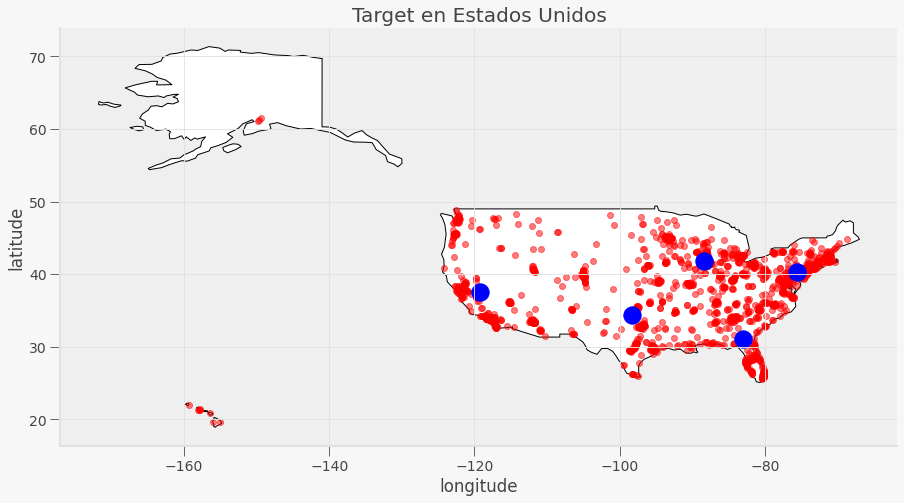

In [59]:
fig, gax = plt.subplots(figsize=(15,10))

world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white') 
gdf.plot(ax=gax, color='red', alpha = 0.5)
geo_mdf.plot(ax=gax, color='blue', alpha = 1, markersize = 300)

#Graficamos
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Las distancias entre los (5) cluster están dadas así:

In [65]:
d_0y1 = (geodesic(Posicion_0, Posicion_1).kilometers)
d_1y2 = (geodesic(Posicion_1, Posicion_2).kilometers)
d_2y3 = (geodesic(Posicion_2, Posicion_3).kilometers)
d_3y4 = (geodesic(Posicion_3, Posicion_4).kilometers)
print('Distancia entre el cluster 0 y 1 es de:', d_0y1, 'km')
print('Distancia entre el cluster 1 y 2 es de:', d_1y2, 'km')
print('Distancia entre el cluster 2 y 3 es de:', d_2y3, 'km')
print('Distancia entre el cluster 3 y 4 es de:', d_3y4, 'km')

Distancia entre el cluster 0 y 1 es de: 3389.3813975339285 km
Distancia entre el cluster 1 y 2 es de: 3752.436842174148 km
Distancia entre el cluster 2 y 3 es de: 2106.59946391056 km
Distancia entre el cluster 3 y 4 es de: 1189.9472619103599 km


In [63]:
print(geodesic(Posicion_0,Posicion_1).kilometers)

3389.3813975339285


**Conclusiones:**

Interesante ejercicio, propio de la vida real. 

Bien, vi importante identificar en el mapa las tiendas que cada cluster definido abarcaría, definí 5 clusteres porque algo que me parece importante en el análisis de la curva Elbow es que cuanto más grande es el número de clusters, la varianza entre estos tiende a disminuir.

La recomendación inicial sería la de ubicar los clusters según la evidencia de k-means, la mayor distancia sería de 3752 km que corresponde a los ubicados en California y Pensilvania. Sin embargo, el de Pensilvania es quien atendería el mayor número de tiendas de todos.

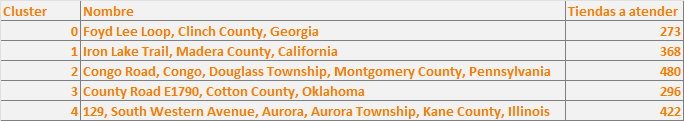

Las librerías fueron de gran ayuda, destaco "geopy" porque permite geolocalizar coordenadas y sobre estas puede hacer cálculos útiles como la distancia entre las posiciones geográficas. Para estos ejercicios siempre es importante analizar sobre el mapa porque no sólo ayuda a que visualmente se capte la atención del cliente, sino también a que se tomen mejores decisiones.
